In [4]:
# Import necessary libraries
import pandas as pd

# Load the dataset directly from the uploaded file
df = pd.read_csv("Tweets.csv")  # Use the filename directly if it's in the same directory

# Display the first few rows
df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [12]:
!pip install wordcloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 3.1 MB/s eta 0:00:00a 0:00:01


In [5]:
# Display basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [6]:
# Number of rows and columns
print("Dataset shape:", df.shape)


Dataset shape: (14640, 15)


In [7]:
# Check for null values
df.isnull().sum()


tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [8]:
# Class distribution
print(df['airline_sentiment'].value_counts())


airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64


In [9]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder

# Download NLTK stopwords if not already done
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Step 1: Handle missing values
# Dropping rows with missing sentiment labels
df = df.dropna(subset=['airline_sentiment'])

# Fill missing values in 'negativereason' with 'Unknown'
df['negativereason'].fillna('Unknown', inplace=True)

# Step 2: Clean the text
def clean_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove special characters and numbers
    text = re.sub(r'\@\w+|\#','', text)  # Remove mentions and hashtags
    text = re.sub(r"[^a-zA-Z\s]", '', text)
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the cleaning function to the 'text' column
df['cleaned_text'] = df['text'].apply(clean_text)

# Step 3: Convert text to lowercase and tokenize
def tokenize(text):
    tokens = text.lower().split()  # Convert to lowercase and split into words
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

df['tokenized_text'] = df['cleaned_text'].apply(tokenize)

# Step 4: Perform label encoding for sentiment classes
label_encoder = LabelEncoder()
df['sentiment_label'] = label_encoder.fit_transform(df['airline_sentiment'])

# Mapping for the labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(f"Label Mapping: {label_mapping}") 


Label Mapping: {'negative': 0, 'neutral': 1, 'positive': 2}


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alijaweddilawari/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


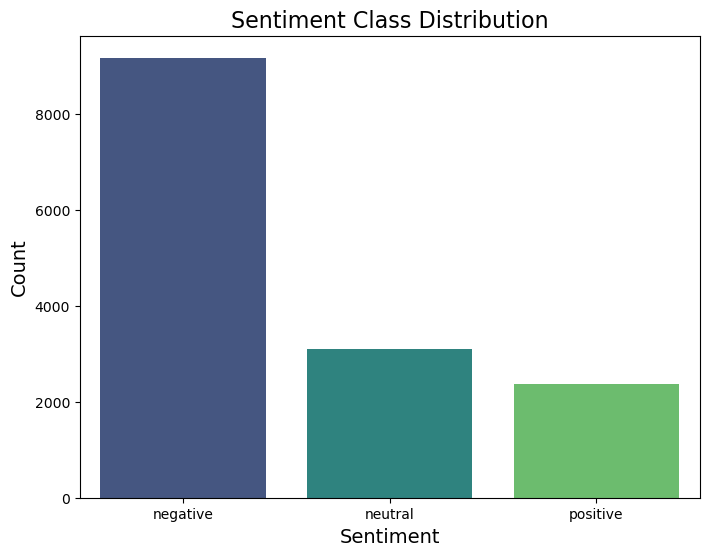

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='airline_sentiment', palette='viridis', order=['negative', 'neutral', 'positive'])
plt.title("Sentiment Class Distribution", fontsize=16)
plt.xlabel("Sentiment", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()


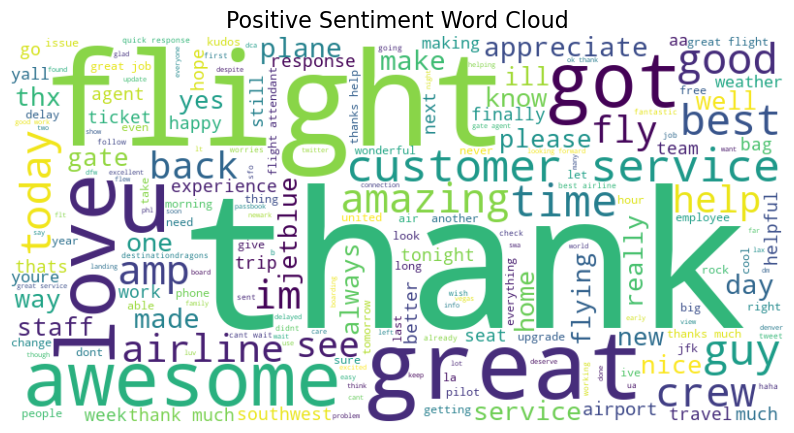

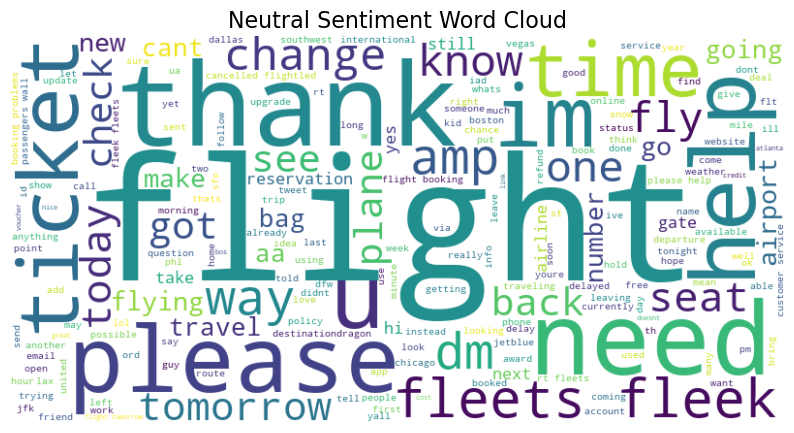

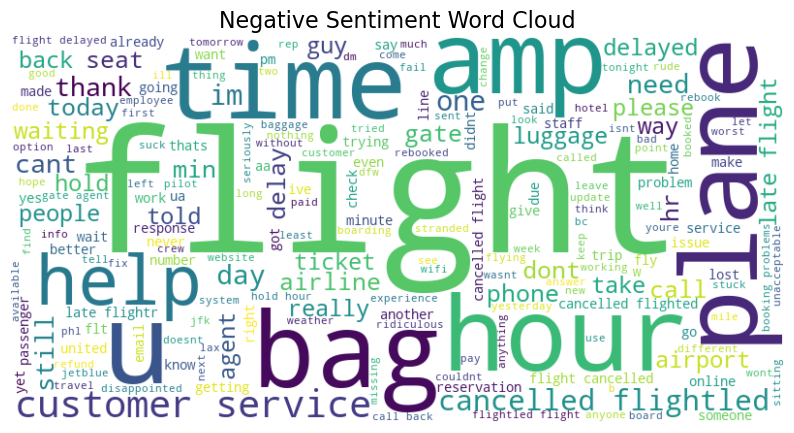

In [13]:
from wordcloud import WordCloud

# Function to generate word clouds
def generate_word_cloud(data, title):
    text = ' '.join(data)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

# Generate word clouds for each sentiment
generate_word_cloud(df[df['airline_sentiment'] == 'positive']['tokenized_text'], "Positive Sentiment Word Cloud")
generate_word_cloud(df[df['airline_sentiment'] == 'neutral']['tokenized_text'], "Neutral Sentiment Word Cloud")
generate_word_cloud(df[df['airline_sentiment'] == 'negative']['tokenized_text'], "Negative Sentiment Word Cloud")


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


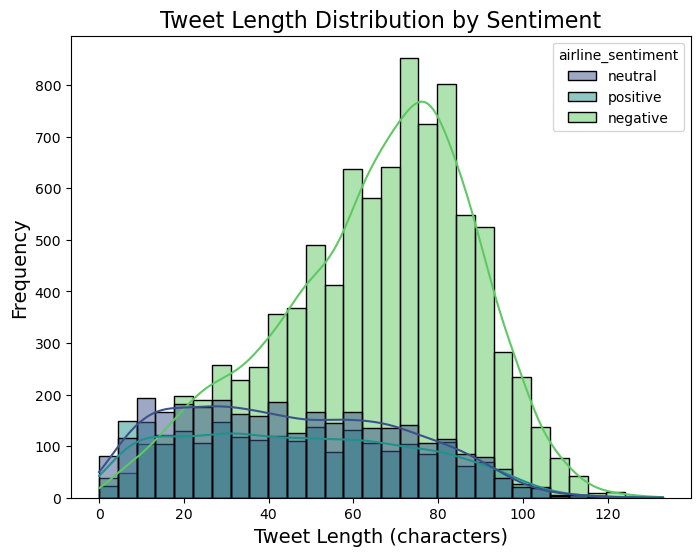

In [14]:
# Calculate tweet lengths
df['tweet_length'] = df['tokenized_text'].apply(len)

# Plot histogram of tweet lengths
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='tweet_length', hue='airline_sentiment', kde=True, palette='viridis', bins=30)
plt.title("Tweet Length Distribution by Sentiment", fontsize=16)
plt.xlabel("Tweet Length (characters)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


In [19]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features for simplicity

# Transform the tokenized text into TF-IDF features
X = tfidf.fit_transform(df['tokenized_text']).toarray()

# Target variable (sentiment labels)
y = df['sentiment_label']


In [20]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Labels Shape: {y_train.shape}")
print(f"Testing Labels Shape: {y_test.shape}")


Training Features Shape: (11712, 5000)
Testing Features Shape: (2928, 5000)
Training Labels Shape: (11712,)
Testing Labels Shape: (2928,)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [22]:
# Initialize models
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
naive_bayes_model = MultinomialNB()
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train models on the training set
logistic_model.fit(X_train, y_train)
naive_bayes_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [23]:
# Evaluate each model
models = {
    "Logistic Regression": logistic_model,
    "Naive Bayes": naive_bayes_model,
    "Random Forest": random_forest_model
}

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("-" * 50)


Evaluating Logistic Regression...
Accuracy: 0.80
Precision: 0.79
Recall: 0.80
F1-Score: 0.79

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.94      0.88      1889
           1       0.67      0.48      0.56       580
           2       0.83      0.62      0.71       459

    accuracy                           0.80      2928
   macro avg       0.77      0.68      0.72      2928
weighted avg       0.79      0.80      0.79      2928

--------------------------------------------------
Evaluating Naive Bayes...
Accuracy: 0.74
Precision: 0.75
Recall: 0.74
F1-Score: 0.70

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.98      0.84      1889
           1       0.72      0.24      0.37       580
           2       0.87      0.37      0.52       459

    accuracy                           0.74      2928
   macro avg       0.77      0.53      0.58      2928
weighted avg  

<Figure size 800x600 with 0 Axes>

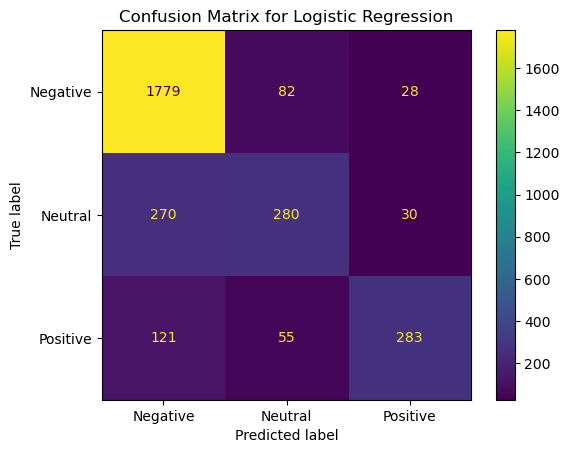

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate predictions using the best model (Logistic Regression)
y_pred_best = logistic_model.predict(X_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best, display_labels=['Negative', 'Neutral', 'Positive'], cmap='viridis')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


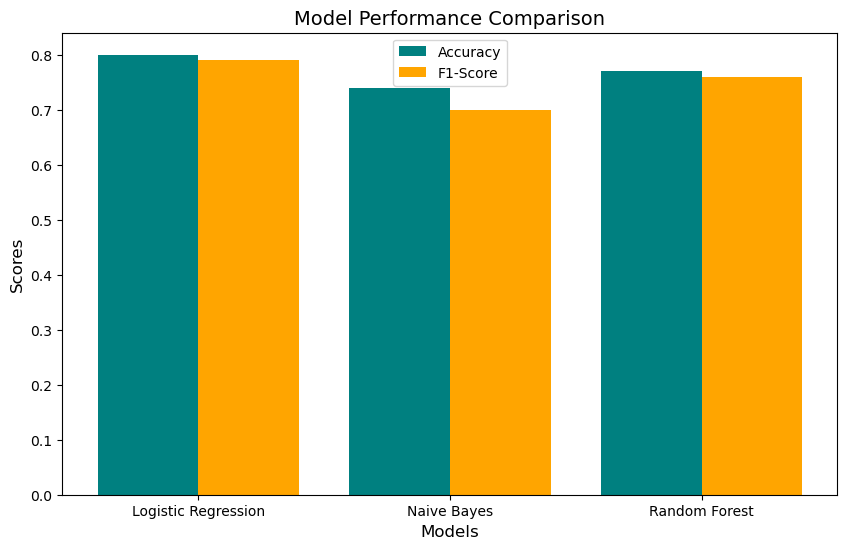

In [25]:
import numpy as np

# Define metrics for visualization
model_names = ['Logistic Regression', 'Naive Bayes', 'Random Forest']
accuracies = [0.80, 0.74, 0.77]  # Replace with actual results if they vary
f1_scores = [0.79, 0.70, 0.76]

# Plot bar chart for accuracy and F1-scores
x = np.arange(len(model_names))  # Label locations

plt.figure(figsize=(10, 6))

# Accuracy Bar Chart
plt.bar(x - 0.2, accuracies, width=0.4, label='Accuracy', color='teal')

# F1-Score Bar Chart
plt.bar(x + 0.2, f1_scores, width=0.4, label='F1-Score', color='orange')

plt.xticks(x, model_names)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.title("Model Performance Comparison", fontsize=14)
plt.legend()
plt.show()
